In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tqdm import tqdm
# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [38]:
# raw_dataset = pd.read_csv("/data/fast0/datasets/glathida-3.1.0/data/T.csv")

T_dataset = pd.read_csv("/home/sa42/data/glac/T_models/T.csv")
TT_dataset = pd.read_csv("/home/sa42/data/glac/T_models/TT.csv")
TTT_dataset = pd.read_csv("/home/sa42/data/glac/T_models/TTT.csv")

# T_dataset = pd.read_csv("~/stuff/coding/glacier/data/T.csv")
# TT_dataset = pd.read_csv("~/stuff/coding/glacier/data/TT.csv")
# TTT_dataset = pd.read_csv("~/stuff/coding/glacier/data/TTT.csv")

T_dataset = T_dataset.drop("GLACIER_DB", axis=1)
T_dataset = T_dataset.drop("POLITICAL_UNIT", axis=1)
T_dataset = T_dataset.drop("GLACIER_ID", axis=1)
T_dataset = T_dataset.drop("GLACIER_NAME", axis=1)
T_dataset = T_dataset.drop("NUMBER_OF_SURVEY_POINTS", axis=1)
T_dataset = T_dataset.drop("NUMBER_OF_SURVEY_PROFILES", axis=1)
T_dataset = T_dataset.drop("TOTAL_LENGTH_OF_SURVEY_PROFILES", axis=1)
T_dataset = T_dataset.drop("INTERPOLATION_METHOD", axis=1)
T_dataset = T_dataset.drop("INVESTIGATOR", axis=1)
T_dataset = T_dataset.drop("SPONSORING_AGENCY", axis=1)
T_dataset = T_dataset.drop("ELEVATION_DATE", axis=1)
T_dataset = T_dataset.drop("SURVEY_METHOD_DETAILS", axis=1)
T_dataset = T_dataset.drop("SURVEY_METHOD", axis=1)
T_dataset = T_dataset.drop("SURVEY_DATE", axis=1)
T_dataset = T_dataset.drop("MEAN_THICKNESS", axis=1)
T_dataset = T_dataset.drop("AREA", axis=1)
T_dataset = T_dataset.drop("MEAN_THICKNESS_UNCERTAINTY", axis=1)
T_dataset = T_dataset.drop("MAXIMUM_THICKNESS", axis=1)
T_dataset = T_dataset.drop("MAX_THICKNESS_UNCERTAINTY", axis=1)
T_dataset = T_dataset.drop("DATA_FLAG", axis=1)
T_dataset = T_dataset.drop("REMARKS", axis=1)
T_dataset = T_dataset.drop("REFERENCES", axis=1)
T_dataset = T_dataset.drop("MEAN_SLOPE", axis=1)
T_dataset = T_dataset.dropna()

TT_dataset = TT_dataset.drop("POLITICAL_UNIT", axis=1)
TT_dataset = TT_dataset.drop("GLACIER_NAME", axis=1)
TT_dataset = TT_dataset.drop("SURVEY_DATE", axis=1)
TT_dataset = TT_dataset.drop("MEAN_THICKNESS_UNCERTAINTY", axis=1)
TT_dataset = TT_dataset.drop("MAXIMUM_THICKNESS", axis=1)
TT_dataset = TT_dataset.drop("MAX_THICKNESS_UNCERTAINTY", axis=1)
TT_dataset = TT_dataset.drop("DATA_FLAG", axis=1)
TT_dataset = TT_dataset.drop("REMARKS", axis=1)
TT_dataset = TT_dataset.dropna()

TTT_dataset = TTT_dataset.drop("POLITICAL_UNIT", axis=1)
TTT_dataset = TTT_dataset.drop("GLACIER_NAME", axis=1)
TTT_dataset = TTT_dataset.drop("SURVEY_DATE", axis=1)
TTT_dataset = TTT_dataset.drop("PROFILE_ID", axis=1)
TTT_dataset = TTT_dataset.drop("THICKNESS_UNCERTAINTY", axis=1)
TTT_dataset = TTT_dataset.drop("DATA_FLAG", axis=1)
TTT_dataset = TTT_dataset.drop("REMARKS", axis=1)
TTT_dataset = TTT_dataset.drop("POINT_ID", axis=1)
TTT_dataset = TTT_dataset.dropna()

T = pd.DataFrame(T_dataset)
T.rename(columns = {"LAT":"LAT_CENT",
                    "LON":"LON_CENT",
                    "AREA":"T_AREA"},
         inplace = True)

TT = pd.DataFrame(TT_dataset)
TT.rename(columns = {"LOWER_BOUND":"TT_LOWER_BOUND",
                     "UPPER_BOUND":"TT_UPPER_BOUND",
                     "AREA":"TT_AREA",
                     "MEAN_SLOPE":"TT_MEAN_SLOPE",
                     "MEAN_THICKNESS":"TT_MEAN_THICKNESS"},
          inplace = True)

TTT = pd.DataFrame(TTT_dataset)
TTT.rename(columns = {"ELEVATION":"POINT_ELEVATION",
                      "THICKNESS":"POINT_THICKNESS"},
           inplace = True)

TTT_plu = pd.merge(T, TTT, how="inner", on=["GlaThiDa_ID"])

TTT_plus = pd.merge(TT,TTT_plu, how="inner", on=["GlaThiDa_ID"])
# TTT_plus.dropna()

TTT_plus = TTT_plus.drop("GlaThiDa_ID",axis=1)
TTT_plus = TTT_plus.drop("TT_MEAN_THICKNESS",axis=1)
TTT_plus = TTT_plus.drop("POINT_LAT",axis=1)
TTT_plus = TTT_plus.drop("POINT_LON",axis=1)
TTT_plus = TTT_plus.drop("POINT_ELEVATION",axis=1)
# TTT_plus = TTT_plus.drop("POINT_LAT",axis=1)
# TTT_plus = TTT_plus.drop("POINT_LAT",axis=1)
# TTT_plus = TTT_plus.drop("POINT_LAT",axis=1)
TTT_plus

,TT_LOWER_BOUND,TT_UPPER_BOUND,TT_AREA,TT_MEAN_SLOPE,LAT_CENT,LON_CENT,POINT_THICKNESS
0,2600,2650,0.01985,24.0,46.9595,9.3891,15
1,2600,2650,0.01985,24.0,46.9595,9.3891,15
2,2600,2650,0.01985,24.0,46.9595,9.3891,15
3,2600,2650,0.01985,24.0,46.9595,9.3891,14
4,2600,2650,0.01985,24.0,46.9595,9.3891,14
...,...,...,...,...,...,...,...
166422,5100,5200,0.01600,32.0,39.2370,97.7550,90
166423,5100,5200,0.01600,32.0,39.2370,97.7550,101
166424,5100,5200,0.01600,32.0,39.2370,97.7550,106
166425,5100,5200,0.01600,32.0,39.2370,97.7550,112


In [39]:
#split the dataset into test and train data sets.
train_dataset = TTT_plus.sample(frac=0.8, random_state=1)
test_dataset = TTT_plus.drop(train_dataset.index)

In [4]:
# sns.pairplot(test_dataset[["TT_LOWER_BOUND",
#                             "TT_UPPER_BOUND",
#                             "TT_AREA",
#                             "TT_MEAN_SLOPE",
#                             "TT_MEAN_THICKNESS",
#                             "POINT_LAT",
#                             "POINT_LON",
#                             "POINT_ELEVATION",
#                             "POINT_THICKNESS",
#                             "LAT_CENT",
#                             "LON_CENT"]],
#              diag_kind='kde')

In [40]:
#separate out features - what will be trained to predict desired attribute
train_features = train_dataset.copy()
test_features = test_dataset.copy()

#define label - attribute training to be picked
train_labels = train_features.pop("POINT_THICKNESS")
test_labels = test_features.pop("POINT_THICKNESS")

train_features.describe().transpose()[['mean', 'std']]

,mean,std
TT_LOWER_BOUND,2955.358249,678.468683
TT_UPPER_BOUND,2997.584699,693.106394
TT_AREA,0.422969,0.635959
TT_MEAN_SLOPE,23.090475,9.025714
LAT_CENT,45.256273,7.522679
LON_CENT,29.987470,36.351443


In [41]:
#establish normalization layers
normalizer = {}
variable_list = ("TT_LOWER_BOUND",
                 "TT_UPPER_BOUND",
                 "TT_AREA",
#                  "TT_MEAN_THICKNESS",
                 "TT_MEAN_SLOPE",
#                  "POINT_LAT",
#                  "POINT_LON",
#                  "POINT_ELEVATION",
                 "LAT_CENT",
                 "LON_CENT")
for variable_name in variable_list:

    normalizer[variable_name] = preprocessing.Normalization(input_shape=[1,], axis=None)
    normalizer[variable_name].adapt(np.array(train_features[variable_name]))
    
    
normalizer['ALL'] = preprocessing.Normalization(axis=-1)
normalizer['ALL'].adapt(np.array(train_features))

In [7]:
def build_linear_model(normalizer):
    model = tf.keras.Sequential([
        normalizer,
        layers.Dense(1)
    ])

    model.compile(
        optimizer=tf.optimizers.Adam(learning_rate=0.001),
        loss="mean_absolute_error")
    
    return model

def plot_single_model_variable(x, y,feature_name):
    plt.scatter(train_features[feature_name], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel(feature_name)
    plt.ylabel("Avg Thickness (m)")
#     plt.xlim((0,20))
    plt.legend()
      
def plot_loss(history):
#     plt.subplots(figsize=(10,5))
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    #   plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    

In [8]:
test_results = {}
linear_model = {}
linear_history = {}
linear_results = {}

In [9]:
%%time
# variable_list = ("TT_LOWER_BOUND",
#                  "TT_UPPER_BOUND",
#                  "TT_AREA",
#                  "TT_MEAN_THICKNESS",
#                  "TT_MEAN_SLOPE",
#                  "POINT_LAT",
#                  "POINT_LON",
#                  "POINT_ELEVATION",
#                  "LAT_CENT",
#                  "LON_CENT")
for variable_name in tqdm(variable_list):

    linear_model[variable_name] = build_linear_model(normalizer[variable_name])
    linear_history[variable_name] = linear_model[variable_name].fit(
                                        train_features[variable_name], train_labels,        
                                        epochs=100,
                                        verbose=0,
                                        validation_split = 0.2)
    linear_results[variable_name] = linear_model[variable_name].evaluate(
                                        test_features[variable_name],
                                        test_labels, verbose=0)

linear_results

100%|██████████| 6/6 [15:57<00:00, 159.65s/it]

CPU times: user 20min 9s, sys: 1min 25s, total: 21min 34s
Wall time: 15min 57s


{'TT_LOWER_BOUND': 20.663820266723633,
 'TT_UPPER_BOUND': 20.676637649536133,
 'TT_AREA': 23.5643367767334,
 'TT_MEAN_SLOPE': 22.37672233581543,
 'LAT_CENT': 23.573402404785156,
 'LON_CENT': 19.264997482299805}

In [10]:
for variable_name in variable_list:    
    df = pd.DataFrame(linear_history[variable_name].history)
    dfs = df.loc[[df.last_valid_index()]]
    dfs.insert(0, 'Variable', [variable_name])
    
    print(dfs)
    print("")


          Variable       loss   val_loss
99  TT_LOWER_BOUND  20.805162  20.650307

          Variable       loss   val_loss
99  TT_UPPER_BOUND  20.819086  20.661221

   Variable       loss   val_loss
99  TT_AREA  23.660889  23.426771

         Variable       loss   val_loss
99  TT_MEAN_SLOPE  22.500854  22.202414

    Variable       loss   val_loss
99  LAT_CENT  23.676809  23.445135

    Variable      loss   val_loss
99  LON_CENT  19.41057  19.159517



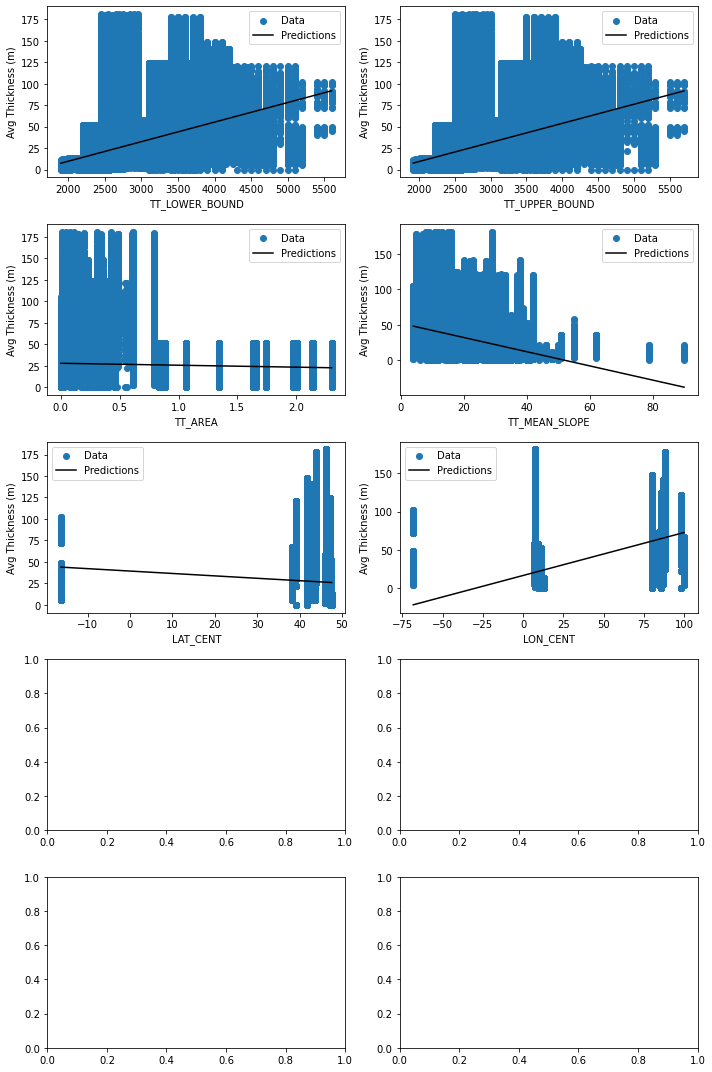

In [11]:
fig,ax=plt.subplots(5,2,figsize=(10,15))
for i, variable_name in enumerate(variable_list):
    plt.subplot(5,2,i+1)
    xmax = np.max(train_features[variable_name])
    xmin = np.min(train_features[variable_name])
    x = tf.linspace(xmin, xmax, 101)
    y = linear_model[variable_name].predict(x)
    plot_single_model_variable(x,y,variable_name)
plt.tight_layout()

/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  if __name__ == '__main__':


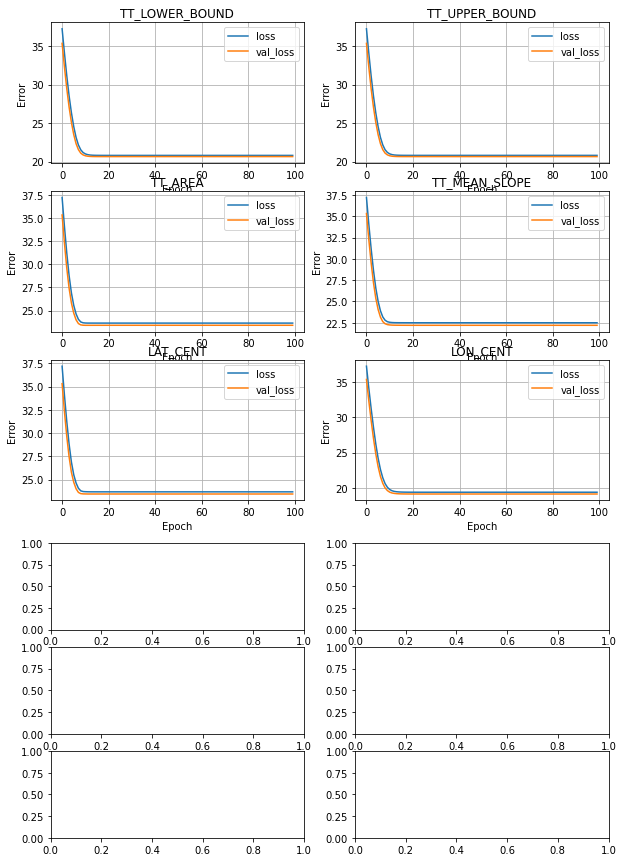

In [12]:
fig,ax=plt.subplots(8,2,figsize=(10,15))
for i, variable_name in enumerate(variable_list):
    ax = plt.subplot(5,2,i+1)

    plt.subplot(5,2,i+1)
    plot_loss(linear_history[variable_name])
    ax.set_title(variable_name)

plt.tight_layout()
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP2_loss.eps")

In [13]:
%%time
linear_model = build_linear_model(normalizer['ALL'])

linear_history_full = linear_model.fit(
train_features, train_labels,        
   epochs=100,
   verbose=0,
   validation_split = 0.2)

test_results["MULTI"] = linear_model.evaluate(
    test_features,
    test_labels, verbose=0)

test_results

CPU times: user 3min 40s, sys: 17.4 s, total: 3min 57s
Wall time: 2min 51s


{'MULTI': 17.16861343383789}

In [14]:
df = pd.DataFrame(linear_history_full.history)
dfs = df.loc[[df.last_valid_index()]]
dfs.insert(0, 'Variable', 'Multi-Variable')
    
print(dfs)
print("")


          Variable       loss   val_loss
99  Multi-Variable  17.330732  17.163841



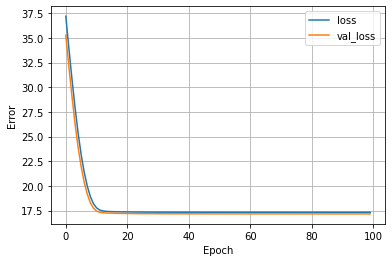

In [15]:
plot_loss(linear_history_full)
# plt.savefig("/home/sa42/notebooks/glac/figs/GTP2_full_loss.eps")

In [16]:
def build_dnn_model(norm):
    model = keras.Sequential([
              norm,
              layers.Dense(64, activation='relu'),
              layers.Dense(64, activation='relu'),
              layers.Dense(1) ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    
    return model

def dnn_test_results(feature_name):
    dnn_test_results[feature_name] = dnn_model.evaluate(
        test_features[feature_name],
        test_labels, verbose=0)

In [17]:
dnn_test_results = {}
dnn_model = {}
dnn_history = {}
dnn_results = {}
dnn_history_full = {}

In [18]:
%%time
# variable_list = ("TT_LOWER_BOUND",
#                  "TT_UPPER_BOUND",
#                  "TT_AREA",
#                  "TT_MEAN_THICKNESS",
#                  "TT_MEAN_SLOPE",
#                  "POINT_LAT",
#                  "POINT_LON",
#                  "POINT_ELEVATION",
#                  "LAT_CENT",
#                  "LON_CENT")
for variable_name in tqdm(variable_list):

    dnn_model[variable_name] = build_dnn_model(normalizer[variable_name])
    dnn_history[variable_name] = dnn_model[variable_name].fit(
                                        train_features[variable_name], train_labels,        
                                        epochs=100,
                                        verbose=0,
                                        validation_split = 0.2)
    dnn_results[variable_name] = dnn_model[variable_name].evaluate(
                                        test_features[variable_name],
                                        test_labels, verbose=0)

dnn_results

100%|██████████| 6/6 [32:25<00:00, 324.17s/it]

CPU times: user 6h 13min 10s, sys: 57min 29s, total: 7h 10min 40s
Wall time: 32min 25s


{'TT_LOWER_BOUND': 18.789695739746094,
 'TT_UPPER_BOUND': 18.799222946166992,
 'TT_AREA': 20.490325927734375,
 'TT_MEAN_SLOPE': 20.677597045898438,
 'LAT_CENT': 19.340505599975586,
 'LON_CENT': 15.421107292175293}

In [19]:
for variable_name in variable_list:    
    df = pd.DataFrame(dnn_history[variable_name].history)
    dfs = df.loc[[df.last_valid_index()]]
    dfs.insert(0, 'Variable', [variable_name])
    
    print(dfs)
    print("")


          Variable       loss   val_loss
99  TT_LOWER_BOUND  18.853245  18.614004

          Variable       loss   val_loss
99  TT_UPPER_BOUND  18.889156  18.653019

   Variable      loss   val_loss
99  TT_AREA  20.56909  20.547873

         Variable       loss   val_loss
99  TT_MEAN_SLOPE  20.892658  20.682428

    Variable       loss   val_loss
99  LAT_CENT  19.364378  19.245462

    Variable      loss   val_loss
99  LON_CENT  15.53469  15.479742



In [20]:
# dnn_results["TT_LOWER_BOUND"]

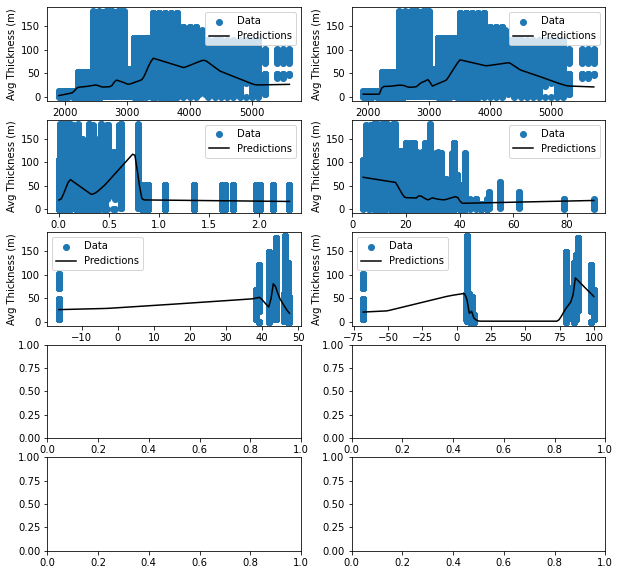

In [21]:
fig,ax=plt.subplots(5,2,figsize=(10,10))
for i, variable_name in enumerate(variable_list):
    plt.subplot(5,2,i+1)
    xmax = np.max(train_features[variable_name])
    xmin = np.min(train_features[variable_name])
    x = tf.linspace(xmin, xmax, 101)
    y = dnn_model[variable_name].predict(x)
    plot_single_model_variable(x,y,variable_name)

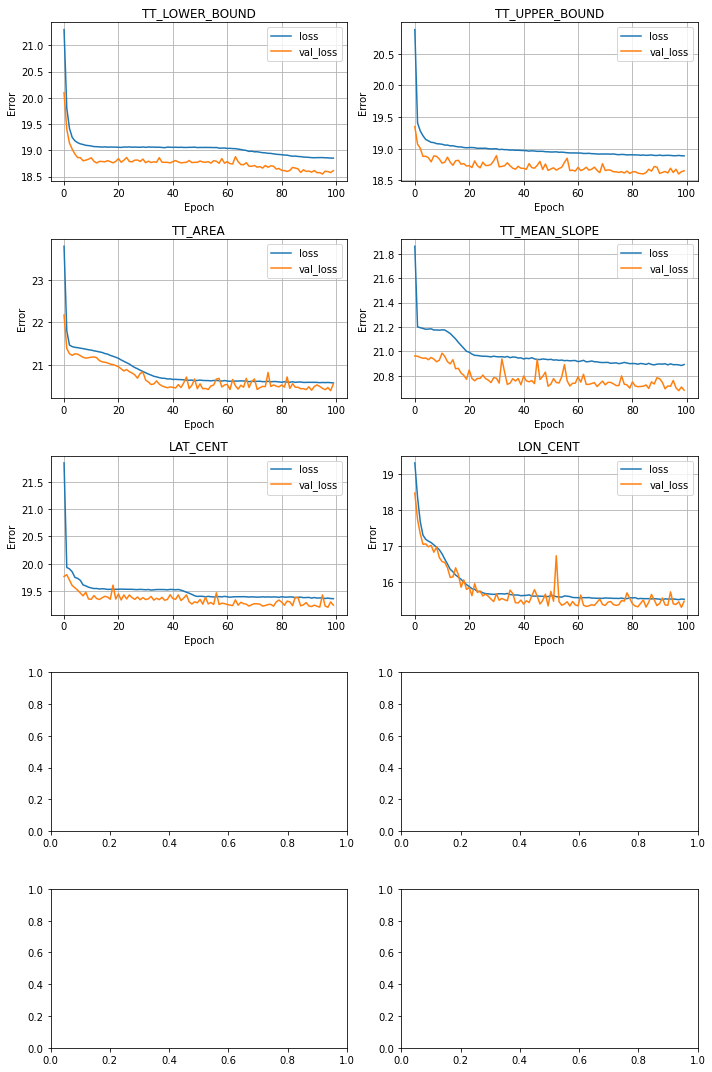

In [22]:
fig,ax=plt.subplots(5,2,figsize=(10,15))
for i, variable_name in enumerate(variable_list):
    plt.subplot(5,2,i+1)
    ax = plt.subplot(5,2,i+1)
    ax.set_title(variable_name)
    plot_loss(dnn_history[variable_name])
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP2_dnn_loss.eps")
plt.tight_layout()

In [42]:
dnn_full_model = build_dnn_model(normalizer['ALL'])

In [43]:
%%time
dnn_history_full = dnn_full_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, 
    epochs=100)

CPU times: user 1h 3min 4s, sys: 9min 30s, total: 1h 12min 35s
Wall time: 5min 28s


In [44]:
df = pd.DataFrame(dnn_history_full.history)
dfs = df.loc[[df.last_valid_index()]]
dfs.insert(0, 'Variable', 'Multi-Variable')
    
print(dfs)
print("")


          Variable       loss   val_loss
99  Multi-Variable  13.686105  13.507937



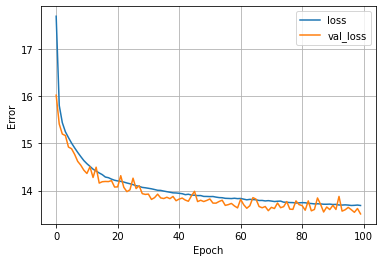

In [45]:
plot_loss(dnn_history_full)
# plt.savefig("/home/sa42/notebooks/glac/figs/GTP2_dnn_full_loss.eps")

In [46]:
dnn_test_results["dnn_full_model"] = dnn_full_model.evaluate(
    test_features,
    test_labels, verbose=0)

dnn_test_results


{'dnn_full_model': 13.4639892578125}

Text(0, 0.5, 'Model Thickness(m)')

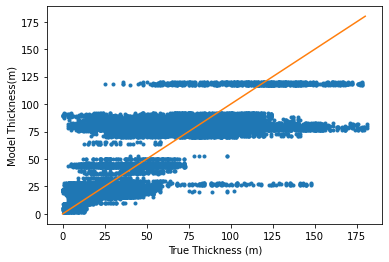

In [47]:
y = dnn_full_model.predict(test_features)
plt.plot(test_labels,y,'.')
plt.plot((0,180),(0,180),'-')
plt.xlabel('True Thickness (m)')
plt.ylabel('Model Thickness(m)')
# plt.savefig("/home/sa42/notebooks/glac/figs/GTP2_res.EPS")

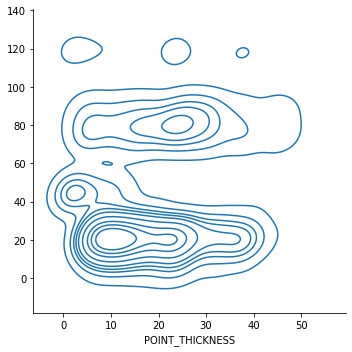

In [48]:
predictions = pd.Series(dnn_full_model.predict(test_features).flatten())
testy_testy_test = pd.concat([test_labels,predictions],axis=1)
sns.displot(testy_testy_test, x=test_labels, y=predictions, kind="kde")


In [49]:
RGI = pd.read_csv("/home/sa42/data/glac/glims/glims_extra/dump2/01_rgi60_Alaska.csv")
RGI = RGI.drop("RGIId", axis=1)
RGI = RGI.drop("GLIMSId", axis=1)
RGI = RGI.drop("BgnDate", axis=1)
RGI = RGI.drop("EndDate", axis=1)
RGI = RGI.drop("O1Region", axis=1)
RGI = RGI.drop("O2Region", axis=1)
# RGI = RGI.drop("Zmin", axis=1)
RGI = RGI.drop("Zmed", axis=1)
# RGI = RGI.drop("Zmax", axis=1)
RGI = RGI.drop("Aspect", axis=1)
RGI = RGI.drop("Lmax", axis=1)
RGI = RGI.drop("Status", axis=1)
RGI = RGI.drop("Connect", axis=1)
RGI = RGI.drop("Form", axis=1)
RGI = RGI.drop("TermType", axis=1)
RGI = RGI.drop("Surging", axis=1)
RGI = RGI.drop("Linkages", axis=1)
RGI = RGI.drop("Name", axis=1)
RGI.rename(columns = {"CenLon":"LON_CENT",
                      "CenLat":"LAT_CENT",
                      "Area":"TT_AREA",
                      "Slope":"TT_MEAN_SLOPE",
                      "Zmin":"TT_LOWER_BOUND",
                      "Zmax":"TT_UPPER_BOUND",},
           inplace = True)
RGI

,LON_CENT,LAT_CENT,TT_AREA,TT_LOWER_BOUND,TT_UPPER_BOUND,TT_MEAN_SLOPE
0,-146.823000,63.689000,0.360,1936,2725,42.0
1,-146.668000,63.404000,0.558,1713,2144,16.0
2,-146.080000,63.376000,1.685,1609,2182,18.0
3,-146.120000,63.381000,3.681,1273,2317,19.0
4,-147.057000,63.551000,2.573,1494,2317,16.0
...,...,...,...,...,...,...
27103,-143.726807,60.231728,534.228,3,3238,10.0
27104,-143.084000,60.532000,0.515,2448,3034,40.0
27105,-129.512000,54.595900,3.564,980,1761,23.5
27106,-129.548000,54.620600,1.414,1314,1823,27.1


In [50]:
variable_list

('TT_LOWER_BOUND',
 'TT_UPPER_BOUND',
 'TT_AREA',
 'TT_MEAN_SLOPE',
 'LAT_CENT',
 'LON_CENT')

In [51]:
normalizer['ALL'].adapt(np.array(RGI))
y_alaska_test = dnn_full_model.predict(RGI)


In [53]:
RGI["Prethicktions"] = y_alaska_test
RGI

,LON_CENT,LAT_CENT,TT_AREA,TT_LOWER_BOUND,TT_UPPER_BOUND,TT_MEAN_SLOPE,Prethicktions
0,-146.823000,63.689000,0.360,1936,2725,42.0,-3207.823486
1,-146.668000,63.404000,0.558,1713,2144,16.0,-2223.276611
2,-146.080000,63.376000,1.685,1609,2182,18.0,-2509.610596
3,-146.120000,63.381000,3.681,1273,2317,19.0,-3471.381104
4,-147.057000,63.551000,2.573,1494,2317,16.0,-3059.485596
...,...,...,...,...,...,...,...
27103,-143.726807,60.231728,534.228,3,3238,10.0,14570.785156
27104,-143.084000,60.532000,0.515,2448,3034,40.0,-2968.706787
27105,-129.512000,54.595900,3.564,980,1761,23.5,-2677.710205
27106,-129.548000,54.620600,1.414,1314,1823,27.1,-2201.410889
